In [3]:
import numpy as np
import pandas as pd
from scipy.special import gamma, factorial

In [15]:
def rho(n, H):
    cov = np.zeros((n, n))
    for l in range(0, n):
        for k in range(0, n):
            cov[l, k] = (abs(k+1)**(2*H) - 2*abs(k)**(2*H) + abs(k-1)**(2*H)) * (abs(l+1)**(2*H) - 2*abs(l)**(2*H) + abs(l-1)**(2*H))/4
    return cov

In [19]:
def R2_fft(n, H):
    cov = rho(n, H)
    s, S = np.zeros((2*(n-1), 2*(n-1))), np.zeros((2*(n-1), 2*(n-1)))
    s[0:n,:] = np.c_[cov[:,0:n-1], cov[:,n-1], cov[:,n-2:0:-1]]
    S = np.r_[s[0:n-1,:], s[n-1,:].reshape(1, 2*(n-1)), s[n-2:0:-1,:]]
    S_tilde = np.fft.fft2(S)
    return S_tilde

In [24]:
def complex_rv(n):
    x_1, x_2 = np.random.multivariate_normal(np.zeros(2*(n-1)), np.diag(np.ones(2*(n-1))), 2*(n-1)), np.random.multivariate_normal(np.zeros(2*(n-1)), np.diag(np.ones(2*(n-1))), 2*(n-1))
    x = np.zeros((2*(n-1), 2*(n-1)), dtype=np.complex)
    for i in range(0, 2*(n-1)):
        for j in range(0, 2*(n-1)):
            x[i, j] = np.complex(x_1[i,j], x_2[i,j])
    return x

In [37]:
def fBs(n, H):
    if H == 0.5:
        y1_tilde = np.random.multivariate_normal(np.zeros(n), np.diag(np.ones(n)), n)
    else:
        S_tilde = R2_fft(n, H)
        x = complex_rv(n)
        y = np.fft.fft2(np.sqrt(S_tilde)*x)
        y1_tilde = (1/(2*n))*y.real[0:n,0:n]
        
    Y = np.zeros((n+1, n+1))
    Y[1:, 1:] = y1_tilde.cumsum(axis=0).cumsum(axis=1)/n**(2*H)
    return Y


In [59]:
Y1 = fBs(300, 0.1)
Y2 = fBs(300, 0.3)
Y3 = fBs(300, 0.5)
Y4 = fBs(300, 0.7)

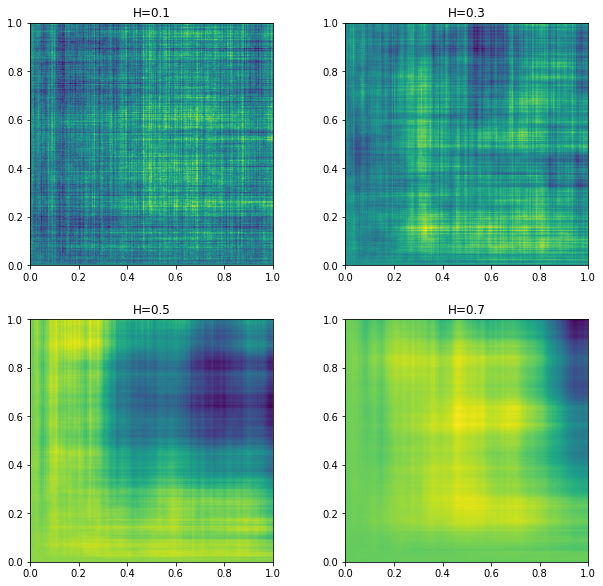

In [60]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharey=False)

plt.subplots_adjust(wspace = 0.3)
im1 = axs[0,0].imshow(Y1, cmap='viridis', interpolation='nearest', origin='lower', extent = [0,1,0,1])
axs[0,0].set_ylim(bottom = 0, top = 1)
axs[0,0].set_xlim(left = 0, right = 1)

im2 = axs[0,1].imshow(Y2, cmap='viridis', interpolation='nearest', origin='lower', extent = [0,1,0,1])
axs[0,1].set_ylim(bottom = 0, top = 1)
axs[0,1].set_xlim(left = 0, right = 1)

im1 = axs[1,0].imshow(Y3, cmap='viridis', interpolation='nearest', origin='lower', extent = [0,1,0,1])
axs[1,0].set_ylim(bottom = 0, top = 1)
axs[1,0].set_xlim(left = 0, right = 1)

im1 = axs[1,1].imshow(Y4, cmap='viridis', interpolation='nearest', origin='lower', extent = [0,1,0,1])
axs[1,1].set_ylim(bottom = 0, top = 1)
axs[1,1].set_xlim(left = 0, right = 1)

axs[0,0].set_title("H=0.1")
axs[0,1].set_title("H=0.3")
axs[1,0].set_title("H=0.5")
axs[1,1].set_title("H=0.7")

plt.savefig('fBs.pdf', bbox_inches = 'tight')

plt.show()